<a href="https://colab.research.google.com/github/donggeunahn/class-2022-spring/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

### Phasor (sine)

sample tick-->time tick-->angle tick-->phase shift-->sin 곡선 만들기 

In [10]:
# parameter setting
amp = 1          # range [-1.0, 1.0]--> 진폭 -->제일 위에서 아래까지-->amp의 범위
sr = 10000       # sampling rate, Hz--> 1초에 몇개의 숫자로 되어 있는가
dur = 0.5        # in seconds 얼마나 긴가
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian--> 시작이 0도

In [11]:
# generate samples ticks-->1,2,3,...5000
nSamp = sr * dur
samples = np.arange(1, nSamp+1)
#시험문제 dur 0.5초 -->몇번째 tick이 오냐-->5000번째
# 1,2,3.. 5000-->마지막은 포함 X

In [12]:
# convert samples to time-->1/10000, 2/10000~5000/10000
t = samples/sr
#sampling rate으로 나눔-->sampling tick이 시간으로 바뀜
#->1,2,3...5000-->1/10000~5000/10000
#-->sin은 각도가 필요함-->radian이 들어가야 함

In [13]:
# convert time to angle in radian-->angle tick으로 바꿔주기
#(1/10000...5000/10000)*2pi*100
theta0 = t * 2*np.pi * freq 
#freq-->1초에 몇번 왔다갔다 하는가-->시간 정보들은 sin 곡서
#1초에 100번 왔다가 갔다-->0.5초까지는 50번 -->2파이가 50번
#1초면 2파이 곱하기 100번
#시험 문제 len(samples)=5000 angle, time도 다 5000

In [14]:
# shift angle by phase
theta = theta0 + phase
#phase를 더해줌

In [15]:
# generate signal by sin-phasor
s = amp * np.sin(theta)
#우리가 원하는 sin곡선
#amp의 범위는 위에 설정한 것처럼 -1부터 1까지

Text(0, 0.5, 'real')

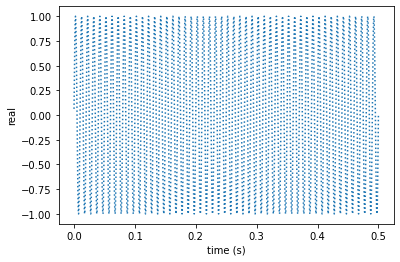

In [16]:
# plot the entire signal
plt.plot(t, s, ':')
#지금은 time
#theta면 xlabel angle(radian)
#태극 문양 한번이 2파이
plt.xlabel('time (s)')
plt.ylabel('real')

Text(0, 0.5, 'real')

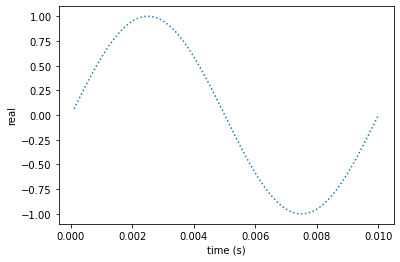

In [17]:
# plot a certain of signals-->sample의 0번째부터 99번째까지--> 잘안보여서
sampleRng = np.arange(0,100)
plt.plot(t[sampleRng], s[sampleRng], ':')
plt.xlabel('time (s)')
plt.ylabel('real')

In [18]:
ipd.Audio(s, rate=10000)
#sound실행의 함수 (signal s, sampling rate)

In [19]:
#function화
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta

In [20]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
#input
#440은 라음 2배나 1/2배하면 라음
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

### Phasor (complex)

sin(theta)-->기존의 sin 곡선
e의 i(허수)*theta 승-->입체적

ppt확인  
1j는 허수

In [21]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

In [22]:
# generate samples
nSamp = sr * dur
samples = np.arange(1, nSamp+1)

In [23]:
# convert samples to time
t = samples/sr

In [24]:
# convert time to angle in radian
theta0 = t * 2*np.pi * freq

In [25]:
# shift angle by phase
theta = theta0 + phase

In [26]:
# generate signal by complex-phasor-->sin과 cos동시에
c = amp * np.exp(theta*1j)
#np.exp(theta*1j)-->sin을 대신함

In [27]:
# plot the entire signal
import plotly.graph_objects as go
x, y, z = t, c.real, c.imag
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [28]:
# plot a certain of signals
import plotly.graph_objects as go
sampleRng = np.arange(0,100)
x, y, z = t[sampleRng], c.real[sampleRng], c.imag[sampleRng]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [29]:
ipd.Audio(c.imag, rate=sr)
#real은 버리고 imaginary는 버림

In [30]:
#function화
def phasor_complex(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  c = amp * np.exp(theta*1j)
  #이부분만 다름 -->1j는 i를 뜻함
  return c, t, theta

In [31]:
amp = 1; sr = 10000; dur = 1; freq = 880; phase = 0
c, t, theta = phasor_complex(amp, sr, dur, freq, phase)
ipd.Audio(c.imag, rate=sr)
#imag part만

### Play musical notes

In [32]:
def getFrequency(note):
    A4=440
    notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

    octave = int(note[2]) if len(note) == 3 else int(note[1])
        
    keyNumber = notes.index(note[0:-1]);
    
    if (keyNumber < 3) :
        keyNumber = keyNumber + 12 + ((octave - 1) * 12) + 1; 
    else:
        keyNumber = keyNumber + ((octave - 1) * 12) + 1; 

    return A4 * 2** ((keyNumber- 49) / 12)

In [33]:
amp = 1; sr = 10000; phase = 0

A4  = getFrequency('A4')
C5  = getFrequency('C5')
F5  = getFrequency('F5')
D5  = getFrequency('D5')
E5  = getFrequency('E5')	 
Eb5 = getFrequency('D#5') 
F5  = getFrequency('F5') 
G5  = getFrequency('G5')
Bb5 = getFrequency('A#5')
D6 = getFrequency('D6')

In [34]:
# The bridge on the river Kwai

notes = [F5, D5, 0, D5, Eb5, F5, D6, 0, D6, 0, Bb5, 0, \
         F5, D5, 0, D5, Eb5, D5, F5, 0, F5, 0, Eb5, 0, \
         Eb5, C5, 0, C5, D5, Eb5, F5, D5, 0, D5, E5, D5, \
         C5, F5, D5, E5, C5, G5, F5]

durs = [0.25, 0.75, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 0.25, \
        0.25, 0.75, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 0.25, \
        0.25, 0.75, 0.25, 0.25, 0.25, 0.25, 0.25, 0.75, 0.25, 0.25, 0.25, 0.25, \
        0.25, 0.5, 0.25, 0.25, 0.5, 0.25, 1.5]

In [35]:
s_all = np.empty(0)

for note, dur in zip(notes, durs):
  s, t, th= phasor_sine(amp, sr, dur, note, phase)
  s_all = np.concatenate((s_all, s))

In [36]:
ipd.Audio(s_all, rate=sr)

### Generate pulse train (=source)

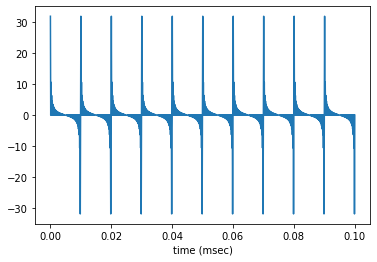

In [37]:
# parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 100
Fend = int(sr/2)  

s_all = 0
for freq in range(F0, Fend+1, F0):
  s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
  s_all += s

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s_all, rate=sr)

### Filter source

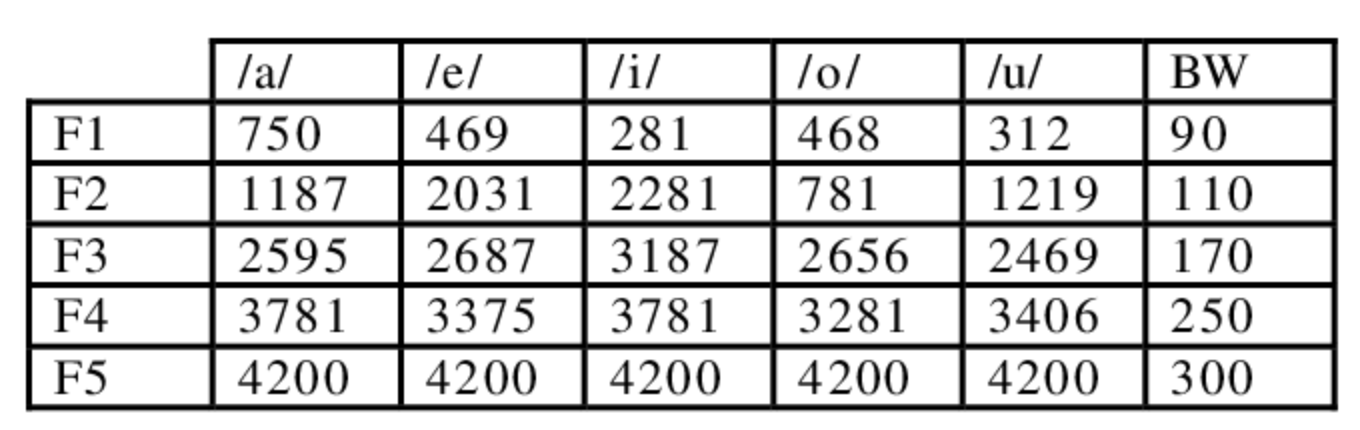

In [38]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [39]:
s = s_all

In [40]:
from scipy.signal import lfilter

RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [41]:
RG = 750  # RG is the frequency of the 1st Formant
BWG = 90  # BWG is the bandwidth of the 1st Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [42]:
RG = 1187  # RG is the frequency of the 2nd Formant
BWG = 110  # BWG is the bandwidth of the 2nd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [43]:
RG = 2595  # RG is the frequency of the 3rd Formant
BWG = 170  # BWG is the bandwidth of the 3rd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [44]:
RG = 3781  # RG is the frequency of the 4th Formant
BWG = 250  # BWG is the bandwidth of the 4th Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [45]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

### Dividing signal by the window size and step

In [46]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

### Load a wav file and frame signal

In [ ]:
from google.colab import files 
from scipy.io import wavfile
fn = files.upload()
sr, s = wavfile.read(list(fn.keys())[0])

s = s/np.max(np.abs(s))
t = np.arange(1, len(s)+1)/sr

win_size = 0.05
win_step = 0.05

frames = frame_signal(s, sr, win_size, win_step)
framesT = np.arange(frames.shape[0]) * win_step + win_size/2

ipd.Audio(s, rate=sr)

### Intensity by RMS

In [ ]:
amp = []
for frame in frames:
  amp.append(np.sqrt(np.mean(frame**2)))

plt.subplot(2,1,1)
plt.plot(t, s)
plt.xlim([0, t[-1]])
plt.subplot(2,1,2)
plt.plot(framesT, amp, '.')
plt.xlim([0, t[-1]])
plt.show()

### Pitch by autocorrelation

In [ ]:
def autocorr(s):
    result = np.correlate(s, s, mode='full')
    maxID = np.argmax(result)
    return result[maxID:]/result[maxID]

In [ ]:
F0 = []
for frame in frames:
  result = autocorr(frame)
  peakIdx = np.argmin(result) + np.argmax(result[np.argmin(result):])
  if result[peakIdx] >= 0.5:
    F0.append(1/(peakIdx/sr))
  else:
    F0.append(np.nan)

plt.subplot(2,1,1)
plt.plot(t, s)
plt.xlim([0, t[-1]])
plt.subplot(2,1,2)
plt.plot(framesT, F0, '.')
plt.xlim([0, t[-1]])
plt.ylim([0, 200])
plt.show()

### Fourier tranform

In [ ]:
from google.colab import files 
from scipy.io import wavfile
fn = files.upload()
sr, s = wavfile.read(list(fn.keys())[0])

s = s/np.max(np.abs(s))
dur = s.shape[0]/sr

nFFT = 512
freq = [];
amp = [];
phase = 0

for n in range(1,nFFT+1):
    freq.append(sr*n/nFFT)
    c, t, theta = phasor_complex(1, sr, dur, freq[-1], phase)
    amp.append(np.abs(np.dot(s,c)))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')
# plt.xlim([0, 5000])